In [42]:
import cv2
import os
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pyDSA_core as dsa
import imutils
import re

In [2]:
import os
os.environ['DISPLAY'] = ':1'
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
from PIL import Image
import numpy as np
import argparse
import imutils
import cv2
from cv2 import drawContours
import math
from typing import List
from skimage import filters
from networkx.algorithms.smallworld import sigma
import matplotlib.pyplot as plt
from skimage import data, filters, color, morphology
from skimage.segmentation import flood, flood_fill

In [3]:
def img_show(img):
    plt.figure() # figsize=(10,10)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255) # should set cmap="grey" otherwise img will be bluegreem
    plt.colorbar()
    plt.show()
    img.shape
    
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

class Point(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
 
    def getX(self):
        return self.x
    def getY(self):
        return self.y

def getGrayDiff(img,currentPoint,tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

def selectConnects(p):
    #if p != 0:
	connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), Point(0, 1), Point(-1, 1), Point(-1, 0)]
    #else:
        #connects = [ Point(0, -1),  Point(1, 0), Point(0, 1), Point(-1, 0)]
	return connects

def regionGrow(img,seeds,thresh,p = 1):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    for seed in seeds:
        seedList.append(seed)
    label = 1
    connects = selectConnects(p)
    while(len(seedList)>0):
        currentPoint = seedList.pop(0)
 
        seedMark[currentPoint.x,currentPoint.y] = label
        for i in range(8):
            tmpX = currentPoint.x + connects[i].x
            tmpY = currentPoint.y + connects[i].y
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue
            grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append(Point(tmpX,tmpY))
    return seedMark


"""
#cv2.imshow('gauss_2_copy_3',gauss_2_copy_3)

seeds_ = [Point(int(center_x_list_2[1]), int(center_y_list_2[1]))]#,Point(int(center_x_list_2[2]), int(center_y_list_2[2])),Point(int(center_x_list_2[3]), int(center_y_list_2[3]))]
RGImg = regionGrow(closing_2, seeds, 3)
cv2.imshow('Region Growing',RGImg)

cv2.waitKey(0)
"""

"\n#cv2.imshow('gauss_2_copy_3',gauss_2_copy_3)\n\nseeds_ = [Point(int(center_x_list_2[1]), int(center_y_list_2[1]))]#,Point(int(center_x_list_2[2]), int(center_y_list_2[2])),Point(int(center_x_list_2[3]), int(center_y_list_2[3]))]\nRGImg = regionGrow(closing_2, seeds, 3)\ncv2.imshow('Region Growing',RGImg)\n\ncv2.waitKey(0)\n"

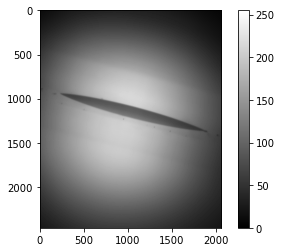

thres_min: 5
thres_max: 225


In [4]:
img = cv2.imread( "/home/bofeng/Desktop/BAM/Robot_platform/OpenCV/img_contact_angle/23.png")
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_show(img = img_grey)
thres_min = img.min()
thres_max = img.max()
print("thres_min:",thres_min)
print("thres_max:" ,thres_max)

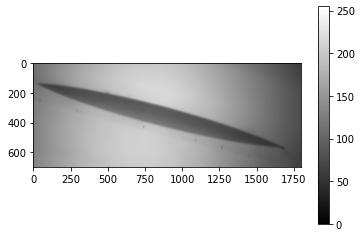

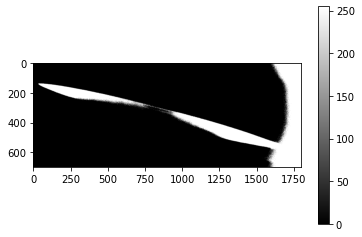

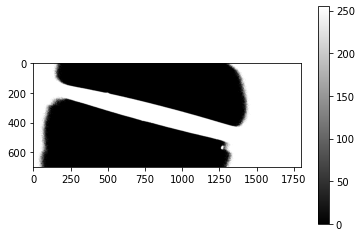

In [5]:
img_grey_roi = img_grey [800:1500, 200:2000] 
img_grey_roi_1 = img_grey_roi.copy()
img_show(img = img_grey_roi)
# img_grey_roi_c = img_grey_roi.copy
# try threshold firstly
ret, img_thres_90 = cv2.threshold(img_grey_roi, 90, 255, cv2.THRESH_BINARY_INV); # value = 90
img_show(img = img_thres_90)

ret, img_thres_140 = cv2.threshold(img_grey_roi, 140, 255, cv2.THRESH_BINARY_INV); # value = 90
img_show(img = img_thres_140)

# seems that cant get both peak in the same time

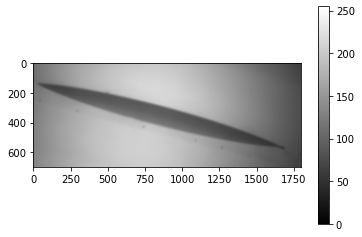

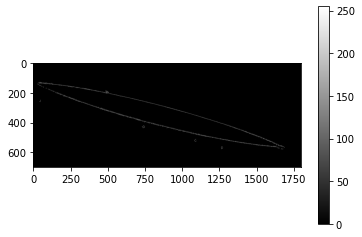

True

In [6]:
# use some open/close opration to ger rid of "noise"
Kernel_Blur = (13,13)
img_Gau = cv2.GaussianBlur(img_grey_roi,Kernel_Blur, 3) 
img_show(img = img_Gau)
cv2.imwrite("img_Gau.png", img_Gau)

"""
img_blur = cv2.bilateralFilter(img_grey_roi, 9, 75, 75)
img_show(img = img_blur)
cv2.imwrite("img_blur.png", img_blur)
"""

img_edges = cv2.Canny(img_Gau,10,20)
img_show(img = img_edges)
cv2.imwrite("Canny.png", img_edges)

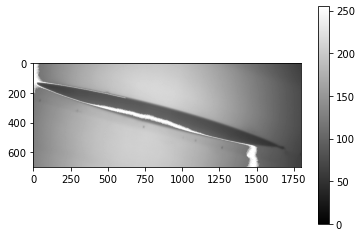

True

In [7]:
flood_f = flood_fill(img_grey_roi, (0,0), 255, tolerance=5)
img_show(img = flood_f)
cv2.imwrite("flood.png", flood_f)

In [8]:
"""
seeds = [Point(0,0)]
RGImg = regionGrow(img_grey_roi, seeds, 5)
#cv2.imshow('Region Growing',RGImg)
img_show(img = RGImg)
"""

"\nseeds = [Point(0,0)]\nRGImg = regionGrow(img_grey_roi, seeds, 5)\n#cv2.imshow('Region Growing',RGImg)\nimg_show(img = RGImg)\n"

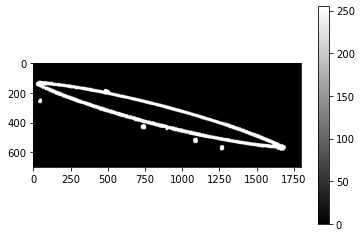

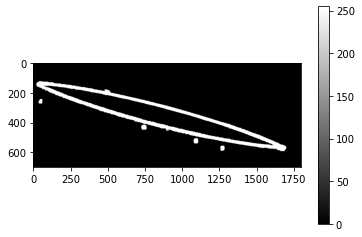

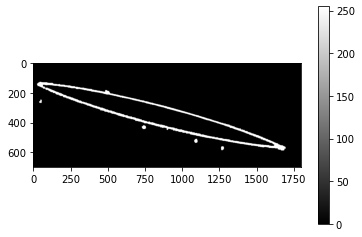

True

In [9]:
Kernel_dial = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
Kernel_ero = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
Kernel_mor = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))

imgDial = cv2.dilate(img_edges, Kernel_dial, iterations=4)
img_show(img = imgDial)
cv2.imwrite("imgDial.png", imgDial)

img_morph_open = cv2.morphologyEx(imgDial, cv2.MORPH_OPEN, Kernel_mor, iterations=3)
img_show(img = img_morph_open)


imgEro = cv2.erode(img_morph_open, Kernel_ero, iterations=2)
img_show(img = imgEro)
cv2.imwrite("imgEro.png", imgEro)

In [10]:
contours, hierarchy = cv2.findContours(np.array(imgEro, dtype=np.uint8), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(img_grey_roi, contours, -1, (0, 255, 0), 3)
len(contours)

5

0 399.0
1 457.0
2 510.5
3 250.5
4 180707.0


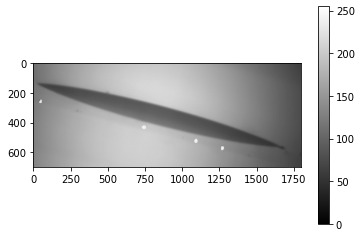

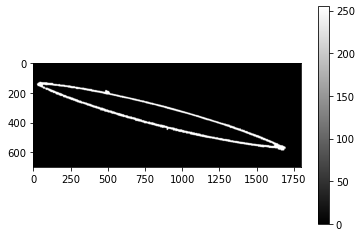

In [11]:
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    print(i, area)#计算轮
    
for i in range(len(contours)):
    area = cv2.contourArea(contours[i]) #计算轮廓所占面积
    if area < 1000:                         #将area小于阈值区域填充背景色，由于OpenCV读出的是BGR值
        cv2.drawContours(img_grey_roi_1,[contours[i]],-1, (240,240,240), thickness=-1)     #原始图片背景BGR值(84,1,68)
        continue
img_show(img_grey_roi_1)

for i in range(len(contours)):
    area = cv2.contourArea(contours[i]) #计算轮廓所占面积
    if area < 1000:                         #将area小于阈值区域填充背景色，由于OpenCV读出的是BGR值
        cv2.drawContours(imgEro,[contours[i]],-1, (0,0,0), thickness=-1)     #原始图片背景BGR值(84,1,68)
        continue
img_show(imgEro)

In [12]:
def fillContour(img):
    	# Threshold.
	# Set values equal to or above 220 to 0.
	# Set values below 220 to 255.

	th, im_th = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV);

	# Copy the thresholded image.
	im_floodfill = im_th.copy()

	# Mask used to flood filling.
	# Notice the size needs to be 2 pixels than the image.
	h, w = im_th.shape[:2]
	mask = np.zeros((h+2, w+2), np.uint8)

	# Floodfill from point (0, 0)
	cv2.floodFill(im_floodfill, mask, (0,0), 255);

	# Invert floodfilled image
	im_floodfill_inv = cv2.bitwise_not(im_floodfill)

	# Combine the two images to get the foreground.
	img_out = im_th | im_floodfill_inv

	return invert_image(imimgErog_out)

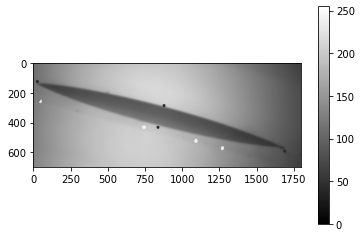

((860.6270751953125, 363.1237487792969), (1724.2235107421875, 151.0809326171875), 15.610987663269043)


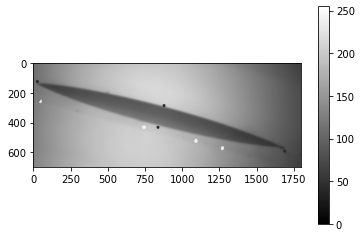

In [18]:
contours, hierarchy = cv2.findContours(np.array(imgEro, dtype=np.uint8), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_grey_roi, contours, -1, (0, 255, 0), 3)
img_show(img_grey_roi_1)
len(contours)

seed_box = cv2.minAreaRect(contours[0])
print(seed_box)
seed_box = cv2.cv.BoxPoints(seed_box) if imutils.is_cv2() else cv2.boxPoints(seed_box)
seed_box = np.array(seed_box, dtype="int")
seed_box = perspective.order_points(seed_box)

#seed_boxes.append(seed_box.astype("int"))

# Get the midpoint of the length and width of the box
(seed_tl, seed_tr, seed_br, seed_bl) = seed_box

# Midpoints of the width sides of box
(seed_tltrX, seed_tltrY) = midpoint(seed_tl, seed_tr)
(seed_blbrX, seed_blbrY) = midpoint(seed_bl, seed_br)

# Midpoints of the length sides of box
(seed_tlblX, seed_tlblY) = midpoint(seed_tl, seed_bl)
(seed_trbrX, seed_trbrY) = midpoint(seed_tr, seed_br)

 
cv2.circle(img_grey_roi_1,(int(seed_tltrX),int(seed_tltrY)),10,40,-1)
cv2.circle(img_grey_roi_1,(int(seed_blbrX),int(seed_blbrY)),10,40,-1)
cv2.circle(img_grey_roi_1,(int(seed_tlblX),int(seed_tlblY)),10,40,-1)
cv2.circle(img_grey_roi_1,(int(seed_trbrX),int(seed_trbrY)),10,40,-1)

img_show(img_grey_roi_1)
init_point = midpoint((int(seed_tltrX), int(seed_tltrY)),(int(seed_blbrX), int(seed_blbrY)))

[[[  27  143]]

 [[1696  577]]]


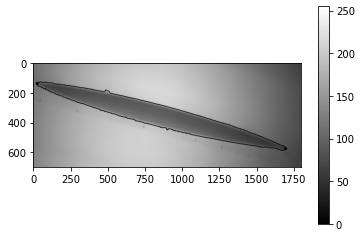

In [72]:
for seed_c in contours:
    # if it's too small, it might be noise, just ignore it
    if cv2.contourArea(seed_c) < 5:
        continue

    epsilon = 0.15*cv2.arcLength(seed_c,True)
    approx = cv2.approxPolyDP(seed_c,epsilon,True)
    #cv2.drawContours(np.array(img_grey_roi), seed_c, -1, (0, 255, 0), 20)
    cv2.drawContours(img_grey_roi, approx, -1, (0, 255, 0), 20)
    print(approx)
    #cv2.waitKey(0)
    
img_show(img_grey_roi)
cv2.imwrite("seed.png", img_grey_roi)

point_1 = str(approx[0])
regex = re.compile('\d+')
point_1_x = int(re.findall(regex, point_1)[0])
point_1_y = int(re.findall(regex, point_1)[1])
point_1_= [point_1_x,point_1_y]

point_2 = str(approx[1])
regex = re.compile('\d+')
point_2_x = int(re.findall(regex, point_2)[0])
point_2_y = int(re.findall(regex, point_2)[1])
point_2_= [point_2_x,point_2_y]


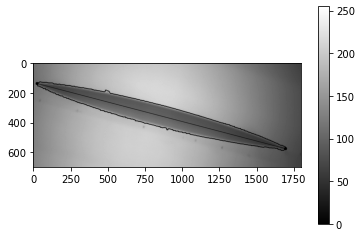

In [73]:
cv2.line(img_grey_roi, point_1_, point_2_, color = (0, 0, 255), thickness = 2, lineType = 8)
img_show(img_grey_roi)